<a href="https://colab.research.google.com/github/aman5898/Data-Science-December/blob/main/22-01-10-Classification_MNIST/ClassWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Getting The Data

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784', version = 1)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,147.0,252.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [7]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [8]:
X = mnist.data.values
X.shape

(70000, 784)

In [9]:
y = np.array(mnist.target)
y.shape

(70000,)

In [10]:
X[0].ndim, X[0].shape

(1, (784,))

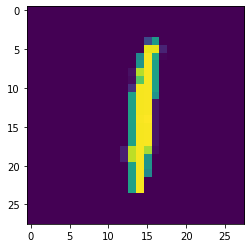

1


In [11]:
plt.imshow(X[112].reshape(28, 28), cmap = 'gray')
plt.show()

print(y[112])

**Convert this to black and white by passing cmap**

In [14]:
y = y.astype('int8')
type(y)

numpy.ndarray

In [15]:
y_5 = y == 5

In [16]:
from sklearn.model_selection import train_test_split

xtrain, xval, ytrain, yval = train_test_split(X, y_5)

In [17]:
xtrain.shape, xval.shape, ytrain.shape, yval.shape

((52500, 784), (17500, 784), (52500,), (17500,))

# Select and train Model

In [18]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()

In [19]:
sgd.fit(xtrain, ytrain)

SGDClassifier()

In [20]:
y_pred = sgd.predict(xval)

In [21]:
y_pred

array([False, False, False, ...,  True, False, False])

In [22]:
yval

array([False, False, False, ..., False, False, False])

In [23]:
(y_pred == yval).sum() / yval.size

0.9604

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, yval)

0.9604

In [25]:
xtrain, xval, ytrain, yval = train_test_split(X, y<5)

In [26]:
sgd.fit(xtrain, ytrain)

SGDClassifier()

In [27]:
y_pred = sgd.predict(xval)
accuracy_score(y_pred, yval)

0.8121142857142857

In [30]:
from sklearn.model_selection import train_test_split

xtrain, xval, ytrain, yval = train_test_split(X, y_5)

sgd.fit(xtrain, ytrain)
y_pred = sgd.predict(xval)

# Confusion Matrix

In [31]:
from sklearn import metrics

metrics.confusion_matrix(y_pred, yval)

array([[15292,   190],
       [  653,  1365]])

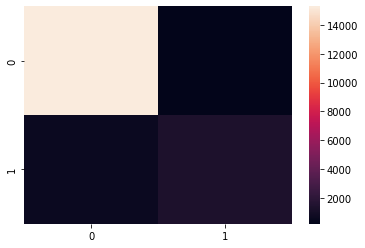

In [32]:
import seaborn as sns

sns.heatmap(metrics.confusion_matrix(y_pred, yval))

In [33]:
metrics.precision_score(y_pred, yval)

0.8778135048231511

In [34]:
metrics.recall_score(y_pred, yval)

0.6764122893954411

In [35]:
metrics.f1_score(y_pred, yval)

0.7640638119227541

# Precision/Recall Tradeoff


![Screenshot_20220103_131814.png](https://raw.githubusercontent.com/aman5898/Pepcoding-Data-Science/main/Ch03_Classification/assets/Screenshot_20220103_131814.png)

In [36]:
y_score = sgd.decision_function(xval)  # return score

In [37]:
y_score

array([  2015.93940983,  -8217.03301173,  -8639.5804434 , ...,
        -2689.09230739, -10676.20525926,  -7621.13400848])

In [38]:
y_score.min(), y_score.max()

(-71338.58253306604, 26913.33689659043)

In [39]:
precisions, recalls, thresholds = metrics.precision_recall_curve(yval, y_score)

In [40]:
t = 5698

print(metrics.precision_score(y_score >= t, yval))
print(metrics.recall_score(y_score >= t, yval))

0.38842443729903536
0.9633173843700159


In [41]:
precisions.shape, recalls.shape, thresholds.shape

((17365,), (17365,), (17364,))

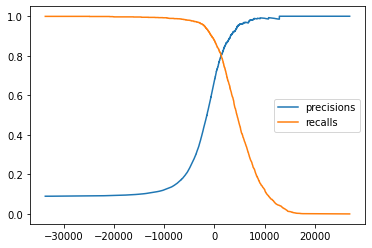

In [42]:
plt.plot(thresholds, precisions[1:], label = 'precisions')
plt.plot(thresholds, recalls[1:], label = 'recalls')

plt.legend()
plt.show()

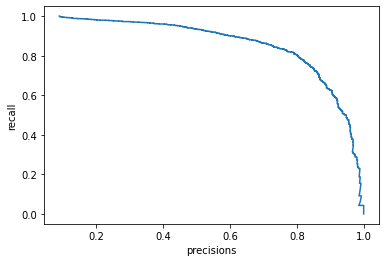

In [43]:
plt.plot(precisions, recalls, label = 'recalls')

plt.xlabel('precisions')
plt.ylabel('recall')
plt.show()

# ROC

Receiver Operating Characteristic curve

In [44]:
fpr, tpr, threshold = metrics.roc_curve(yval, y_score)

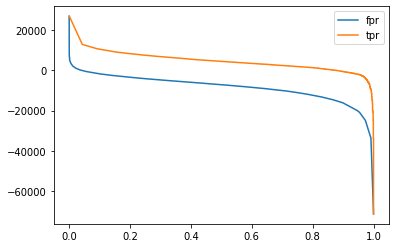

In [45]:
plt.plot(fpr, threshold, label = 'fpr')
plt.plot(tpr, threshold, label = 'tpr')

plt.legend()

**AUC** Area Under The Curve

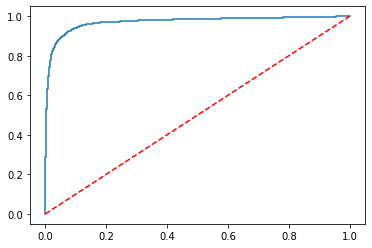

In [46]:
plt.plot(fpr, tpr, label = 'auc')
plt.plot([0, 1], [0, 1], '--r')

In [47]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

In [48]:
forest.fit(xtrain, ytrain)

RandomForestClassifier()

In [49]:
y_score_forest = forest.predict_proba(xval)  # return score

In [50]:
y_score

array([  2015.93940983,  -8217.03301173,  -8639.5804434 , ...,
        -2689.09230739, -10676.20525926,  -7621.13400848])

In [51]:
y_score_forest = y_score_forest[:, 1]
y_score_forest

array([0.82, 0.05, 0.02, ..., 0.17, 0.  , 0.07])

In [52]:
fpr_f, tpr_f, threshold_f = metrics.roc_curve(yval, y_score_forest)

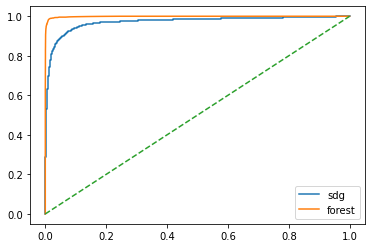

In [53]:
plt.plot(fpr, tpr, label = 'sdg')
plt.plot(fpr_f, tpr_f, label = 'forest')
plt.plot([0, 1], [0, 1], '--')
plt.legend()

# MultiClassClassifier

## One Vs One

In [54]:
from sklearn.model_selection import train_test_split

xtrain, xval, ytrain, yval = train_test_split(X, y)

In [55]:
from sklearn.multiclass import OneVsOneClassifier

ovo = OneVsOneClassifier(sgd, n_jobs= -1)
ovo.fit(xtrain, ytrain)

OneVsOneClassifier(estimator=SGDClassifier(), n_jobs=-1)

In [67]:
y_pred_ovo = ovo.predict(xval)

In [57]:
y_pred

array([4, 3, 4, ..., 8, 1, 4], dtype=int8)

In [60]:
len(ovo.estimators_)

45

# One Vs Rest

In [61]:
from sklearn.multiclass import OneVsRestClassifier

ovr = OneVsRestClassifier(sgd, n_jobs= -1)
ovr.fit(xtrain, ytrain)

OneVsRestClassifier(estimator=SGDClassifier(), n_jobs=-1)

In [63]:
y_pred = ovr.predict(xval)

In [64]:
y_pred

array([4, 3, 4, ..., 8, 1, 4], dtype=int8)

In [65]:
len(ovr.estimators_)

10

In [66]:
from sklearn.metrics import accuracy_score

accuracy_score(yval, y_pred)

0.8756

In [68]:
accuracy_score(yval, y_pred_ovo)

0.9139428571428572

In [69]:
forest = RandomForestClassifier()
forest.fit(xtrain, ytrain)

RandomForestClassifier()

In [70]:
y_pred_forest = forest.predict(xval)

In [71]:
accuracy_score(yval, y_pred_forest)

0.9687428571428571